<a href="https://colab.research.google.com/github/yogeshsinghgit/Pwskills_Assignment/blob/main/Logistic_Regression_Assignment_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Logistic Regression Assignment-2

[Assignment Link](https://drive.google.com/file/d/1loCSphb_-z51RfRNJK_dFdOGQleht4UA/view)

## Q1. What is the purpose of grid search cv in machine learning, and how does it work?

In almost any Machine Learning project, we train different models on the dataset and select the one with the best performance. However, there is room for improvement as we cannot say for sure that this particular model is best for the problem at hand. Hence, our aim is to improve the model in any way possible. One important factor in the performances of these models are their hyperparameters, once we set appropriate values for these hyperparameters, the performance of a model can improve significantly.


GridSearchCV is the process of performing hyperparameter tuning in order to determine the optimal values for a given model. As mentioned above, the performance of a model significantly depends on the value of hyperparameters. Note that there is no way to know in advance the best values for hyperparameters so ideally, we need to try all possible values to know the optimal values. Doing this manually could take a considerable amount of time and resources and thus we use GridSearchCV to automate the tuning of hyperparameters.

**How It Works:**

we pass predefined values for hyperparameters to the GridSearchCV function. We do this by defining a dictionary in which we mention a particular hyperparameter along with the values it can take. Here is an example of it



```python
 { 'C': [0.1, 1, 10, 100, 1000],  
   'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
   'kernel': ['rbf','linear','sigmoid']  }
```

Here C, gamma and kernels are some of the hyperparameters of an SVM model. Note that the rest of the hyperparameters will be set to their default values.


GridSearchCV tries all the combinations of the values passed in the dictionary and evaluates the model for each combination using the Cross-Validation method. Hence after using this function we get accuracy/loss for every combination of hyperparameters and we can choose the one with the best performance.

## Q2. Describe the difference between grid search cv and randomize search cv, and when might you choose one over the other?

Grid Search CV and Randomized Search CV are both hyperparameter optimization techniques used to tune machine learning models, but they differ in how they search through the hyperparameter space. Here are the key differences and considerations for choosing one over the other:

**Grid Search CV:**
- **Search Method:** Grid Search CV performs an exhaustive search through a predefined set of hyperparameter combinations. It systematically evaluates every possible combination of hyperparameters.
- **Scalability:** Grid search can become computationally expensive as the number of hyperparameters and their potential values increases. The search space grows exponentially with the number of hyperparameters.
- **Search Space:** Grid search is best suited for relatively small search spaces or when you have a good understanding of which hyperparameters are crucial and have limited computational resources.
- **Deterministic:** Grid search is deterministic; it will always explore the same combinations of hyperparameters, which can be helpful for reproducibility.

**Randomized Search CV:**
- **Search Method:** Randomized Search CV randomly samples a specified number of hyperparameter combinations from the search space. It does not explore all possible combinations but focuses on a random subset.
- **Scalability:** Randomized search can handle a larger search space more efficiently, as it does not require evaluating every possible combination. It is suitable for high-dimensional hyperparameter spaces or when you have limited computational resources.
- **Exploration:** Randomized search allows you to explore a broader range of hyperparameter combinations and can be more effective in finding good configurations, especially in cases where you are uncertain about which hyperparameters are most important.
- **Non-Deterministic:** Randomized search is non-deterministic; different runs may explore different combinations. While this may lead to variability in results, it can be advantageous for discovering unexpected configurations.

**When to Choose Grid Search CV:**
- When you have a small and well-understood hyperparameter space.
- When you have sufficient computational resources to evaluate all possible combinations.
- When you want deterministic and reproducible results.
- When you believe that certain hyperparameters have a strong impact on model performance and want to explore all combinations systematically.

**When to Choose Randomized Search CV:**
- When you have a large hyperparameter space and want to efficiently explore a broader range of possibilities.
- When computational resources are limited, and you cannot afford to evaluate all possible combinations.
- When you want to introduce randomness in the search to potentially discover novel hyperparameter configurations.
- When you are unsure which hyperparameters are most important and want to explore different combinations.

In practice, your choice between Grid Search CV and Randomized Search CV depends on the complexity of your hyperparameter space, the resources available, and your goals. In some cases, you may even combine both techniques by first using randomized search to narrow down the search space and then using grid search to fine-tune within the reduced space.

## Q3. What is data leakage, and why is it a problem in machine learning? Provide an example.

Data leakage, also known as leakage or information leakage, occurs when information from outside the training dataset is inadvertently used to train a machine learning model. Data leakage can lead to inaccurate and overly optimistic model performance evaluations and is considered a significant problem in machine learning for several reasons:

1. **Overestimated Model Performance:** Data leakage can make a model appear more accurate than it actually is during training and evaluation. This is problematic because it may lead to the deployment of a model that performs poorly in a real-world setting.

2. **Inflated Validation Metrics:** When data leakage occurs, the model may perform exceptionally well on validation or test data, leading to high accuracy, precision, recall, or other evaluation metrics. This can create a false sense of confidence in the model's capabilities.

3. **Unrealistic Expectations:** Data leakage can set unrealistic expectations for model performance, and stakeholders may expect the same level of performance on new, unseen data. When the model encounters data it hasn't seen before, its performance may drop significantly.

4. **Ineffective Model Generalization:** A model trained with data leakage may not generalize well to new, unseen data. It becomes overly tailored to the specific patterns in the leaked information, making it less useful for its intended purpose.

5. **Bias and Discrimination:** Data leakage can inadvertently introduce bias into the model, as it may pick up on demographic or discriminatory information that should not be used for decision-making, leading to ethical and legal concerns.

Here's an example of data leakage:

**Example: Credit Card Default Prediction**

Suppose you are building a model to predict credit card defaults. You have a dataset with features like income, credit history, and payment behavior.

Data Leakage Scenario:
1. In your dataset, you have a feature called "credit_limit" that represents the credit limit of each cardholder.
2. Unknown to you, during data preprocessing, the credit_limit feature has been transformed or calculated using future information, such as whether the cardholder defaulted in the next month.
3. The model is trained on this data without you realizing the issue.

In this case, the problem is that the "credit_limit" feature is not information that would be available at the time you are making a prediction. The feature indirectly leaks information about future defaults into the model. As a result, your model may appear highly accurate when tested on the training data because it has essentially learned to predict future defaults directly from the "credit_limit" feature. However, it will fail to perform well when applied to new data, as it does not have access to future information about credit defaults for new cardholders.

To avoid data leakage, it's essential to carefully preprocess and clean your data, understand the context of the problem, and be aware of any potential sources of information that could lead to leakage. Proper data handling and feature engineering are crucial for preventing data leakage and ensuring that your machine learning models provide reliable and realistic performance estimates.

## Q4. How can you prevent data leakage when building a machine learning model?

Preventing data leakage is crucial when building machine learning models to ensure the reliability and accuracy of your model's performance evaluations. Here are several strategies to help prevent data leakage:

1. **Understand the Problem and Data:**
   - Gain a deep understanding of the problem you're trying to solve, the data you're working with, and the domain in which the model will be applied. This understanding will help you identify potential sources of data leakage.

2. **Separate Data Appropriately:**
   - Split your data into training, validation, and test sets. Ensure that these sets are mutually exclusive, and no data is shared between them. Data from the validation and test sets should not influence the training process.

3. **Temporal Data Handling:**
   - If working with time-series data, make sure you respect the temporal order. The training data should precede the validation and test data in terms of time. Features derived from future information should not be used.

4. **Feature Engineering:**
   - Be cautious when creating or transforming features. Any feature that relies on information that would not be available at the time of prediction should be avoided. Features should be derived solely from past or contemporaneous data.

5. **Use Validation Sets Properly:**
   - Apply cross-validation techniques carefully. Ensure that validation and test datasets are kept separate from the training data, and no information from the validation or test sets influences the model during training.

6. **Data Preprocessing:**
   - Handle missing data appropriately. Missing data should not be imputed using information from the entire dataset or using future information. Use techniques like mean imputation or predictive imputation based on the training data.

7. **Remove Irrelevant Information:**
   - Identify and remove features that are irrelevant to the problem you're trying to solve or that may introduce leakage. Features that contain information about the target variable or have a strong temporal component should be carefully examined.

8. **Be Wary of Labels and Targets:**
   - Ensure that labels or target values are determined solely based on information available at the time of prediction. For example, in a classification problem, labels should not be based on future events.

9. **Cross-Validation Techniques:**
   - When using cross-validation, ensure that the dataset is divided into folds in a way that respects the temporal or hierarchical structure of the data. Techniques like time series cross-validation or group-wise cross-validation can help prevent leakage.

10. **Audit Data Pipelines:**
    - Regularly review and audit data preprocessing and feature engineering pipelines to ensure they do not introduce leakage unintentionally.

11. **Documentation and Communication:**
    - Document the data sources, transformations, and preprocessing steps thoroughly. Maintain clear communication with team members and stakeholders to raise awareness of the importance of avoiding data leakage.

12. **Validation and Testing Protocol:**
    - Establish a strict protocol for model validation and testing that clearly outlines how data should be split, the evaluation metrics to be used, and the steps for evaluating model performance.

By following these precautions and being diligent in your data handling and feature engineering processes, you can significantly reduce the risk of data leakage in your machine learning models. It's essential to maintain a keen awareness of potential sources of leakage throughout the model development process.

## Q5. What is a confusion matrix, and what does it tell you about the performance of a classification model?

A confusion matrix, also known as an error matrix, is a summarized table used to assess the performance of a classification model. The number of correct and incorrect predictions are summarized with count values and broken down by each class.

Below is an image of the structure of a 2×2 confusion matrix. To give an example, let’s say that there were ten instances where a classification model predicted ‘Yes’ in which the actual value was ‘Yes’. Then the number ten would go in the top left corner in the True Positive quadrant. This leads us to some key terms:

* Positive (P): Observation is positive (eg. is a dog).
* Negative (N): Observation is not positive (eg. is not a dog).
* True Positive (TP): Outcome where the model correctly predicts the positive class.
* True Negative (TN): Outcome where the model correctly predicts the negative class.
* False Positive (FP): Also called a type 1 error, an outcome where the model incorrectly predicts the positive class when it is actually negative.
* False Negative (FN): Also called a type 2 error, an outcome where the model incorrectly predicts the negative class when it is actually positive.

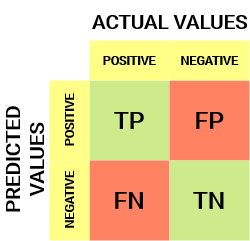





## Q6. Explain the difference between precision and recall in the context of a confusion matrix.

In the context of a confusion matrix, precision and recall are two important metrics used to evaluate the performance of a classification model, especially for binary classification problems. They provide insights into the model's ability to correctly classify positive instances (e.g., the presence of a condition or an event) relative to the actual distribution of those instances in the dataset.

Here's how precision and recall are defined and their differences:

1. **Precision (Positive Predictive Value):**
   - Precision measures the accuracy of the positive predictions made by the model. It answers the question: "Of all the instances the model classified as positive, how many were correctly classified?"
   - Precision is calculated as:
     \[ \text{Precision} = \frac{\text{True Positives}}{\text{True Positives} + \text{False Positives}} \]
   - A high precision indicates that when the model predicts a positive outcome, it is likely to be correct. It is a measure of the model's ability to avoid false positives.

2. **Recall (Sensitivity or True Positive Rate):**
   - Recall measures the model's ability to identify all the relevant positive instances in the dataset. It answers the question: "Of all the actual positive instances, how many were correctly classified by the model?"
   - Recall is calculated as:
     $[ \text{Recall} = \frac{\text{True Positives}}{\text{True Positives} + \text{False Negatives}} ]$
   - A high recall indicates that the model is effective at capturing most of the positive instances. It is a measure of the model's ability to avoid false negatives.

**Key Differences:**

- **Objective:** Precision focuses on the accuracy of positive predictions, emphasizing the minimization of false positives, while recall focuses on the model's ability to find and capture most of the actual positive instances, emphasizing the minimization of false negatives.

- **Trade-off:** Precision and recall are often in tension with each other. Improving precision may lead to a decrease in recall, and vice versa. It can be challenging to optimize both metrics simultaneously.

- **Use Cases:** Precision is particularly important when the cost of false positives is high, and you want to be very certain about the positive predictions. Recall is important when it's critical to capture as many true positive instances as possible, even if it means accepting some false positives.

- **Harmonic Mean (F1 Score):** In practice, a single metric that balances precision and recall is often needed. The F1 score is the harmonic mean of precision and recall, providing a single value that considers both metrics:
  $[ F1\text{ Score} = \frac{2 \cdot \text{Precision} \cdot \text{Recall}}{\text{Precision} + \text{Recall}}]$
  The F1 score is useful for finding a trade-off between precision and recall when optimizing a model.

In summary, precision and recall are essential metrics to evaluate the performance of a classifier, especially in situations where the cost of false positives and false negatives varies. They help in understanding the strengths and weaknesses of a model's classification performance, and the choice between them depends on the specific goals of the application.

## Q7. How can you interpret a confusion matrix to determine which types of errors your model is making?

To interpret a confusion matrix and understand the types of errors your model is making, follow these steps:

1. **Focus on the Diagonal Elements:**
   - Start by examining the main diagonal of the confusion matrix (TP and TN). These represent the instances that your model correctly classified. TP and TN are the correct predictions, and they show where your model is performing well.

2. **False Positives (FP):**
   - Analyze the values in the row of the actual negative class but predicted as positive (FP). FP represents the Type I errors, where your model falsely predicted a positive outcome when it's actually negative. Understanding the rate of false positives is crucial, especially when the cost of making such errors is high.

3. **False Negatives (FN):**
   - Examine the values in the row of the actual positive class but predicted as negative (FN). FN represents the Type II errors, where your model falsely predicted a negative outcome when it's actually positive. Investigate the rate of false negatives, as they are important when missing positive instances has serious consequences.

4. **Precision and Recall:**
   - Use the confusion matrix to calculate precision and recall:
     - Precision = TP / (TP + FP)
     - Recall (Sensitivity) = TP / (TP + FN)
   - Precision indicates how accurate your model is when predicting the positive class, and recall shows the model's ability to capture the actual positive instances. These metrics provide insights into the trade-off between minimizing false positives and false negatives.

5. **Specificity and False Positive Rate (FPR):**
   - Specificity = TN / (TN + FP)
   - FPR = 1 - Specificity
   - Specificity measures the model's ability to correctly predict the negative class, and the FPR is the rate of Type I errors. These metrics are important in scenarios where minimizing false positives is crucial.

6. **Accuracy:** Calculate overall accuracy:
   - Accuracy = (TP + TN) / (TP + TN + FP + FN)
   - Accuracy gives you an overall measure of your model's correctness but may not be sufficient for imbalanced datasets or when different costs are associated with false positives and false negatives.

7. **F1 Score:** Calculate the F1 score as the harmonic mean of precision and recall:
   - F1 Score = 2 * (Precision * Recall) / (Precision + Recall)
   - The F1 score provides a balanced measure of a model's performance, particularly when you want to balance precision and recall.

8. **Visualize Error Patterns:** Explore specific examples of false positives and false negatives to understand the characteristics of instances where the model is making errors. This can help guide further model improvement or feature engineering.

By thoroughly analyzing a confusion matrix and its associated metrics, you can gain valuable insights into the strengths and weaknesses of your classification model and make informed decisions to improve its performance.

## Q8. What are some common metrics that can be derived from a confusion matrix, and how are they calculated?

A confusion matrix is a fundamental tool for evaluating the performance of a classification model, and it can be used to calculate various metrics that provide insights into different aspects of model performance. Here are some common metrics derived from a confusion matrix and their calculations:

Consider a binary classification confusion matrix:

```python
                      Actual Positive    Actual Negative
Predicted Positive       True Positives (TP)     False Positives (FP)
Predicted Negative       False Negatives (FN)    True Negatives (TN)
```

1. **Accuracy (ACC):**
   - Accuracy measures the overall correctness of the model's predictions:

     $Accuracy = \frac{TP + TN}{TP + TN + FP + FN}$


2. **Precision (Positive Predictive Value, PPV):**
   - Precision calculates the accuracy of the positive predictions made by the model:

     $[ Precision = \frac{TP}{TP + FP} ]$

3. **Recall (Sensitivity, True Positive Rate, TPR):**
   - Recall evaluates the model's ability to capture all the actual positive instances:
   
     $[Recall = \frac{TP}{TP + FN} ]$

4. **Specificity (True Negative Rate, TNR):**
   - Specificity measures the model's ability to correctly predict the negative class:

     $[Specificity = \frac{TN}{TN + FP} ]$

5. **False Positive Rate (FPR):**
   - FPR is the rate of Type I errors, i.e., instances falsely predicted as positive when they are negative:

     $[ FPR = 1 - Specificity]$

6. **F1 Score (F1):**
   - The F1 score is the harmonic mean of precision and recall, providing a balanced measure of a model's performance:

     $[text{F1 Score} = \frac{2 \cdot \text{Precision} \cdot \text{Recall}}{\text{Precision} + \text{Recall}} ]$



## Q9. What is the relationship between the accuracy of a model and the values in its confusion matrix?

The relationship between the accuracy of a model and the values in its confusion matrix is essential for understanding how well the model is performing in a classification task. Accuracy is one of the most straightforward metrics used to evaluate the overall performance of a classification model. To understand this relationship, let's first define accuracy and then explore how it is related to the values in the confusion matrix.

**Accuracy (ACC):**
Accuracy is a measure of the overall correctness of a classification model. It represents the proportion of correctly classified instances (both true positives and true negatives) out of the total number of instances in the dataset. The accuracy formula is as follows:

\[ \text{Accuracy (ACC)} = \frac{\text{True Positives (TP) + True Negatives (TN)}}{\text{Total Number of Instances (TP + TN + False Positives (FP) + False Negatives (FN))}} \]

Now, let's establish the relationship between accuracy and the confusion matrix:

- **True Positives (TP):** These are instances correctly classified as positive by the model. They contribute to both the numerator and the denominator of the accuracy formula.

- **True Negatives (TN):** These are instances correctly classified as negative by the model. They also contribute to both the numerator and the denominator of the accuracy formula.

- **False Positives (FP):** These are instances incorrectly classified as positive when they are actually negative. They are part of the denominator but not the numerator.

- **False Negatives (FN):** These are instances incorrectly classified as negative when they are actually positive. Similar to false positives, they are part of the denominator but not the numerator.

So, the relationship between accuracy and the values in the confusion matrix can be summarized as follows:

\[ \text{Accuracy} = \frac{TP + TN}{TP + TN + FP + FN} \]

- Accuracy is a function of both the correct classifications (TP and TN) and the incorrect classifications (FP and FN). It quantifies the model's overall ability to make correct predictions, irrespective of whether they are positive or negative.

- An increase in TP or TN (correct classifications) contributes positively to accuracy, while an increase in FP or FN (incorrect classifications) negatively affects accuracy.

- In the context of a confusion matrix, accuracy is a measure of how well the model balances its true positive and true negative classifications against its false positive and false negative classifications.

It's important to note that while accuracy is a straightforward and commonly used metric, it may not always be the most appropriate measure for assessing model performance, especially in imbalanced datasets or when the cost of different types of errors varies. In such cases, other metrics like precision, recall, F1 score, or area under the ROC curve (AUC-ROC) may provide a more informative evaluation of the model's performance.

## Q10. How can you use a confusion matrix to identify potential biases or limitations in your machine learning model?

A confusion matrix can be a valuable tool for identifying potential biases or limitations in your machine learning model, particularly when dealing with classification tasks. Here's how you can use a confusion matrix to uncover and address potential issues:

1. **Class Imbalance:**
   - Check the distribution of classes in the confusion matrix. If one class significantly dominates the other, it may indicate class imbalance. This imbalance can lead to biased model predictions and may necessitate the use of techniques like oversampling, undersampling, or class-weighted loss functions to mitigate the bias.

2. **False Positives and False Negatives:**
   - Analyze the rates of false positives and false negatives. Consider the implications of each error type. For example, in a medical diagnosis application, false negatives might be more critical than false positives. Understanding these error types can help you fine-tune the model's behavior to align with the desired outcome.

3. **Bias Towards the Majority Class:**
   - Investigate whether the model tends to favor predicting the majority class. This bias can be especially problematic in imbalanced datasets. Techniques like class-weighted loss functions or resampling can help address this issue.

4. **Demographic or Attribute-Based Bias:**
   - Examine whether the model's performance varies significantly across different demographic groups or attributes (e.g., gender, race, age). Biases may emerge if the model is more accurate for one group and less accurate for another. Carefully evaluate potential sources of bias, and consider fairness-aware machine learning techniques to mitigate these biases.

5. **Threshold Sensitivity:**
   - Explore the impact of different classification thresholds on the confusion matrix. Changing the threshold can lead to varying trade-offs between precision and recall. Assess how the model behaves at different threshold settings and select the one that aligns with the problem's requirements.

6. **Misclassification Patterns:**
   - Examine patterns in the confusion matrix to identify common types of misclassifications. This can help you understand the specific challenges the model faces and devise strategies to address them, such as feature engineering or model tuning.

7. **Consistency Across Splits:**
   - If you are using cross-validation, assess whether the biases and limitations observed in the confusion matrix are consistent across different data splits. Inconsistent performance across folds may indicate issues with model generalization.

8. **Performance on Specific Subsets:**
   - Consider evaluating model performance on specific subsets of the data, such as specific time periods or subpopulations. Biases and limitations may be more pronounced in certain subsets, and this analysis can provide insights into when and where the model may perform poorly.

9. **Model Interpretability:**
   - Leverage model interpretability techniques to understand the reasons behind the model's predictions. Interpretability can help identify potential sources of bias and limitations in the model's decision-making process.

10. **Bias Mitigation Techniques:**
    - Based on your analysis of the confusion matrix and identified biases, implement bias mitigation techniques. These may include re-sampling strategies, fairness-aware models, adversarial debiasing, and carefully designed feature engineering.

Regularly monitoring and analyzing the confusion matrix as your model operates in real-world settings is crucial for maintaining fairness, reducing bias, and improving overall model performance. It can help you uncover and address potential issues that might not be apparent from a single evaluation metric.